# Exploring the Intersection of Race/Ethnicity, COVID-19, and Breast Cancer

In [1]:
#!pip install pyreadr

import pyreadr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

raw_data = pyreadr.read_r('48_-_breast_cancer_data.RData')['out']
raw_data.to_csv('dataset')

raw_data

,der_ordinal_v1a,der_days_fu,der_deadbinary,der_dead30,der_mv,der_ICU,der_hosp,der_AKI_comp,der_MOF_comp,der_coinfection_any,...,der_txline,der_heme,der_metastatic,der_met_bone,der_met_liver,der_met_lung_v2,der_age_trunc,der_CV_event_v2,der_pulm_event,der_GI_event
0,0,30.0,No,No,No,No,No,No,No,No,...,First line,0,Missing/Unknown,NaN,NaN,NaN,58.0,No,Yes,No
1,0,180.0,No,No,No,No,No,No,No,NaN,...,Non-curative NOS,0,Yes,Yes,No,No,67.0,No,No,No
2,1,10.5,No,No,No,No,Yes,No,No,NaN,...,First line,0,No,No,No,No,42.0,No,No,No
3,1,180.0,No,No,No,No,Yes,No,No,No,...,Untreated in last 12 months,0,Yes,Yes,Yes,No,49.0,No,Yes,No
4,0,180.0,No,No,No,No,No,No,No,No,...,First line,0,No,No,No,No,47.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0,180.0,No,No,No,No,No,No,No,No,...,First line,0,No,No,No,No,58.0,No,No,No
1379,1,30.0,No,No,No,No,Yes,Yes,No,No,...,Curative NOS,0,Yes,No,No,No,73.0,No,No,No
1380,0,135.0,No,No,No,No,No,No,No,No,...,Untreated in last 12 months,0,No,No,No,No,60.0,No,No,No
1381,1,10.5,No,No,No,No,Yes,No,No,No,...,Untreated in last 12 months,0,No,No,No,No,60.0,No,Yes,No


In [2]:
raw_data.columns

Index(['der_ordinal_v1a', 'der_days_fu', 'der_deadbinary', 'der_dead30',
       'der_mv', 'der_ICU', 'der_hosp', 'der_AKI_comp', 'der_MOF_comp',
       'der_coinfection_any', 'der_sepsis_comp', 'der_bleeding_comp',
       'der_rem', 'der_hcq', 'der_steroids_c19', 'der_other_tx_c19_v2',
       'der_o2_ever', 'der_race_v2', 'der_insurance', 'der_smoking2',
       'der_obesity', 'der_card', 'der_pulm', 'der_renal', 'der_dm2',
       'der_ecogcat2', 'der_breast_biomarkers', 'der_cancer_status_v4',
       'der_cancer_tx_timing_v2', 'der_cancertr_none', 'der_any_cyto',
       'der_any_targeted', 'der_her2_3m', 'der_cdk46i_3m', 'der_other_3m',
       'der_any_endo', 'der_any_immuno', 'der_any_local', 'der_any_other',
       'der_region_v2', 'urban_rural', 'der_site_type',
       'severity_of_covid_19_v2', 'der_tr_intent', 'der_txline', 'der_heme',
       'der_metastatic', 'der_met_bone', 'der_met_liver', 'der_met_lung_v2',
       'der_age_trunc', 'der_CV_event_v2', 'der_pulm_event', 'der_GI_e

In [3]:
clean_data = pd.DataFrame({
    'Race/Ethnicity': raw_data['der_race_v2'],
    'Cancer Status': raw_data['der_cancer_status_v4'],
    'COVID-19 Severity': raw_data['severity_of_covid_19_v2'],
    'Death (Binary)': raw_data['der_deadbinary'],
    'Death (30days)':raw_data['der_dead30'],
    'Mechanical Ventilation': raw_data['der_mv'],
    'ICU Admission': raw_data['der_ICU'],
    'Hospitalization': raw_data['der_hosp'],
    'Cardiovascular Event': raw_data['der_CV_event_v2'],
    'Pulmonary Event': raw_data['der_pulm_event'],
    'GI Event': raw_data['der_GI_event'],
    'Bleeding Complication': raw_data['der_bleeding_comp'],
    'Acute Kidney Injury': raw_data['der_AKI_comp'],
    'Multisystem Organ Failure': raw_data['der_MOF_comp'],
    'Coinfection': raw_data['der_coinfection_any'],
    'Remdesivir Treatment': raw_data['der_rem'],
    'Hydroxychloroquine Treatment': raw_data['der_hcq'],
    'Steroids Treatment': raw_data['der_steroids_c19'],
    'Other COVID-19 Treatment': raw_data['der_other_tx_c19_v2']})


clean_data

,Race/Ethnicity,Cancer Status,COVID-19 Severity,Death (Binary),Death (30days),Mechanical Ventilation,ICU Admission,Hospitalization,Cardiovascular Event,Pulmonary Event,GI Event,Bleeding Complication,Acute Kidney Injury,Multisystem Organ Failure,Coinfection,Remdesivir Treatment,Hydroxychloroquine Treatment,Steroids Treatment,Other COVID-19 Treatment
0,Non-Hispanic White,Active and responding,Severe,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,No,No
1,Hispanic,Active and stable,Mild,No,No,No,No,No,No,No,No,No,No,No,NaN,No,No,No,Yes
2,Hispanic,NaN,Moderate,No,No,No,No,Yes,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN
3,Other,Unknown,Moderate,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No
4,Hispanic,Active and responding,Mild,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,Other,Active and responding,Mild,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1379,Non-Hispanic Black,Active and responding,Moderate,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No
1380,Non-Hispanic White,"Remission or no evidence of disease, >5 years",Mild,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1381,Non-Hispanic Black,Unknown,Moderate,No,No,No,No,Yes,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes


In [4]:
clean_data.columns

Index(['Race/Ethnicity', 'Cancer Status', 'COVID-19 Severity',
       'Death (Binary)', 'Death (30days)', 'Mechanical Ventilation',
       'ICU Admission', 'Hospitalization', 'Cardiovascular Event',
       'Pulmonary Event', 'GI Event', 'Bleeding Complication',
       'Acute Kidney Injury', 'Multisystem Organ Failure', 'Coinfection',
       'Remdesivir Treatment', 'Hydroxychloroquine Treatment',
       'Steroids Treatment', 'Other COVID-19 Treatment'],
      dtype='object')

In [5]:
clean_data['Race/Ethnicity'].dropna()
race_counts = clean_data['Race/Ethnicity'].value_counts()
race_counts

Race/Ethnicity
Non-Hispanic White    736
Non-Hispanic Black    289
Hispanic              235
Other                  78
Non-Hispanic AAPI      45
Name: count, dtype: int64

Text(0.5, 1.0, 'Race/Ethnic Distribution in the study')

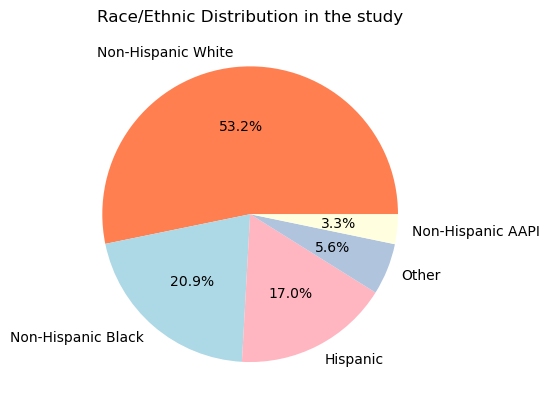

In [6]:
colors = ['coral', 'lightblue', 'lightpink', 'lightsteelblue', 'lightyellow']
plt.pie(race_counts, labels=race_counts.index, colors=colors, autopct='%1.1f%%')
plt.title('Race/Ethnic Distribution in the study')


In [7]:
#merge new df with percentage list on it
race_counts_df = pd.DataFrame({'Count': [235, 45, 289, 736, 78]}, 
                              index=['Hispanic', 'Non-Hispanic AAPI', 'Non-Hispanic Black', 'Non-Hispanic White','Other'])

race_percentage = (race_counts_df / race_counts_df.sum() * 100).round(2).astype(str) + '%'
race_counts_df['Percentage'] = race_percentage
race_counts_df



,Count,Percentage
Hispanic,235,16.99%
Non-Hispanic AAPI,45,3.25%
Non-Hispanic Black,289,20.9%
Non-Hispanic White,736,53.22%
Other,78,5.64%


In [8]:
#Race/Ethnic Distribution and COVID-19
#Race/Ethnic Distribution and Breast Cancer
#Severity of Breast Cancer and COVID-19

## Race/Ethnic Distribution and COVID-19

In [9]:
covid_severity = pd.DataFrame(clean_data[['Race/Ethnicity','COVID-19 Severity']])
covid_severity

,Race/Ethnicity,COVID-19 Severity
0,Non-Hispanic White,Severe
1,Hispanic,Mild
2,Hispanic,Moderate
3,Other,Moderate
4,Hispanic,Mild
...,...,...
1378,Other,Mild
1379,Non-Hispanic Black,Moderate
1380,Non-Hispanic White,Mild
1381,Non-Hispanic Black,Moderate


In [10]:
# covid_data in percentage
covid_data = covid_severity.loc[(clean_data['COVID-19 Severity'] != 'Unknown'), :]
covid_data = covid_severity.dropna(subset=['COVID-19 Severity'])
covid_data = covid_data.set_index(['Race/Ethnicity'])

severity_counts = covid_severity.groupby(['Race/Ethnicity', 'COVID-19 Severity']).size().unstack(fill_value=0)
print(severity_counts)
173/(173+28+177+535+50)

COVID-19 Severity   Mild  Moderate  Severe
Race/Ethnicity                            
Hispanic             173        56       6
Non-Hispanic AAPI     28        14       3
Non-Hispanic Black   177        97      15
Non-Hispanic White   535       174      25
Other                 50        21       7


0.17964693665628245

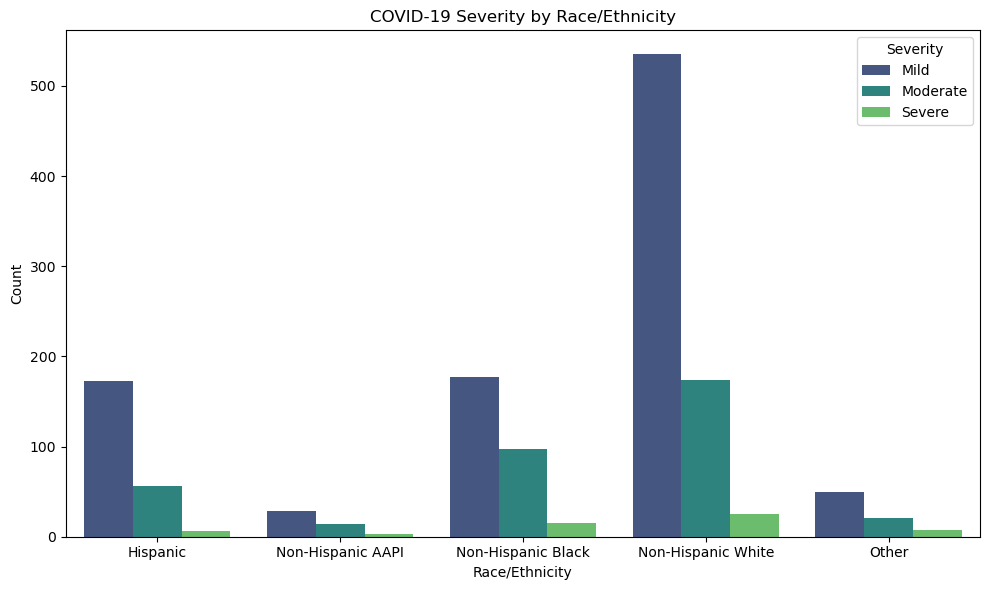

In [11]:
#chatgpt been used for coding in Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Race/Ethnicity', hue='COVID-19 Severity', data=covid_severity, palette='viridis')
plt.title('COVID-19 Severity by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.tight_layout()

In [12]:
normalized_severity = (severity_counts.div(severity_counts.sum(axis=1), axis=0) * 100).round(2).astype(str) + '%'
normalized_severity

COVID-19 Severity,Mild,Moderate,Severe
Race/Ethnicity,,,
Hispanic,73.62%,23.83%,2.55%
Non-Hispanic AAPI,62.22%,31.11%,6.67%
Non-Hispanic Black,61.25%,33.56%,5.19%
Non-Hispanic White,72.89%,23.71%,3.41%
Other,64.1%,26.92%,8.97%


In [13]:
race_and_severity = pd.merge(race_counts_df, normalized_severity, left_index=True, right_index=True)

race_and_severity.rename(columns={'Count': 'Race Count','Percentage': 'Race Percentage',
                                  'Mild': 'COVID-19 Severity(Mild)',
                                  'Moderate': 'COVID-19 Severity(Moderate)',
                                  'Severe': 'COVID-19 Severity(Severe)'}, inplace=True)
race_and_severity

,Race Count,Race Percentage,COVID-19 Severity(Mild),COVID-19 Severity(Moderate),COVID-19 Severity(Severe)
Hispanic,235,16.99%,73.62%,23.83%,2.55%
Non-Hispanic AAPI,45,3.25%,62.22%,31.11%,6.67%
Non-Hispanic Black,289,20.9%,61.25%,33.56%,5.19%
Non-Hispanic White,736,53.22%,72.89%,23.71%,3.41%
Other,78,5.64%,64.1%,26.92%,8.97%


## Race/Ethnic Distribution and Breast Cancer

In [14]:
cancer_severity = pd.DataFrame(clean_data[['Race/Ethnicity','Cancer Status']])
cancer_severity = cancer_severity.dropna(subset=['Cancer Status'])
cancer_severity = cancer_severity.loc[(clean_data['Cancer Status'] != 'Unknown'), :]
cancer_severity = cancer_severity.set_index(['Race/Ethnicity'])
cancer_severity.sample(20)

,Cancer Status
Race/Ethnicity,
Non-Hispanic White,"Remission or no evidence of disease, <5 years"
Other,Active and stable
Non-Hispanic AAPI,"Remission or no evidence of disease, <5 years"
Other,"Remission or no evidence of disease, <5 years"
Hispanic,"Remission or no evidence of disease, <5 years"
Non-Hispanic White,Active and stable
Non-Hispanic White,"Remission or no evidence of disease, >5 years"
Non-Hispanic White,"Remission or no evidence of disease, >5 years"
Non-Hispanic White,"Remission or no evidence of disease, <5 years"


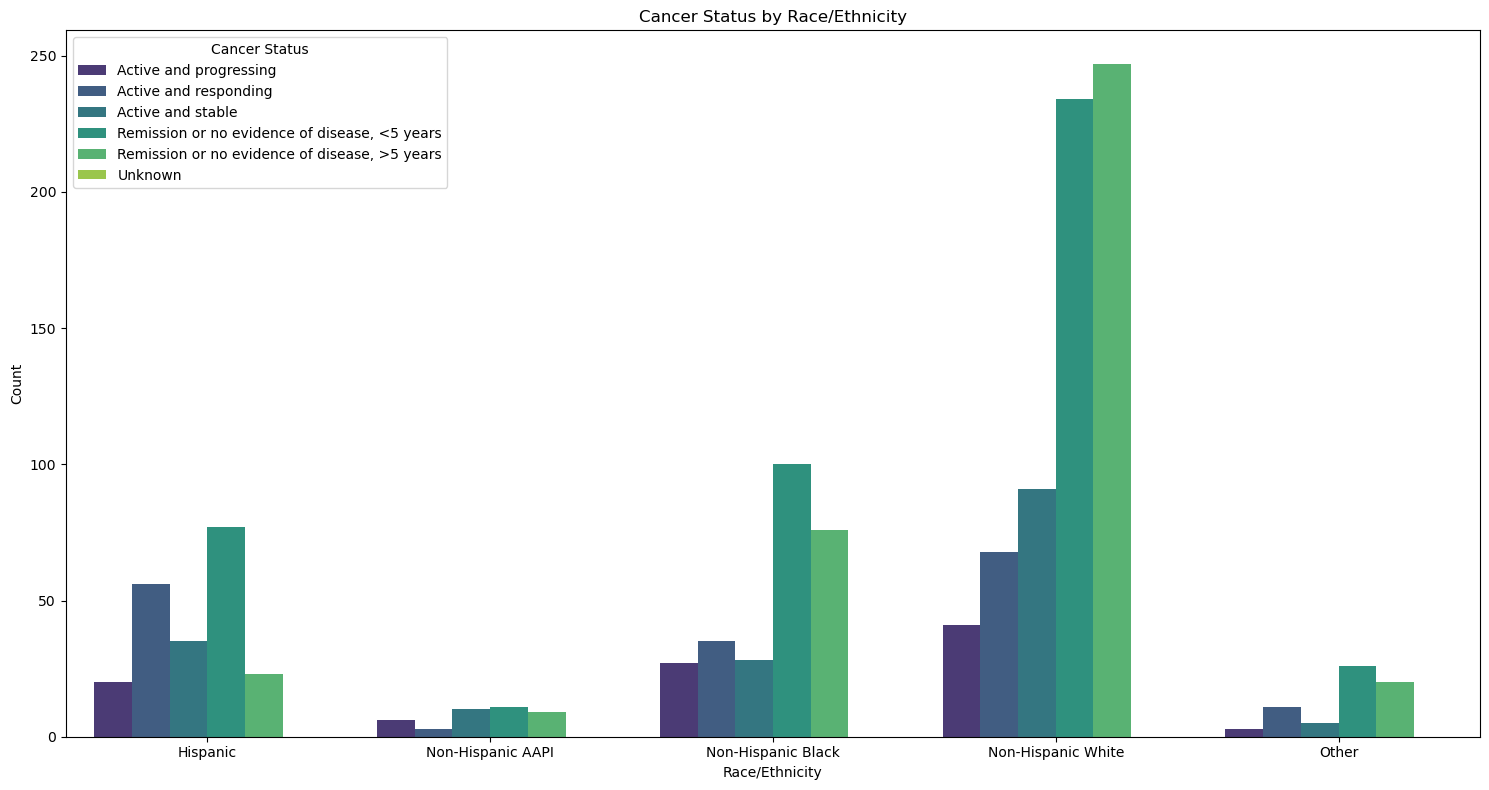

In [15]:
cancer_severity_reset = cancer_severity.reset_index()

plt.figure(figsize=(15, 8))
sns.countplot(x='Race/Ethnicity', hue='Cancer Status', data=cancer_severity_reset, palette='viridis')
plt.title('Cancer Status by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.legend(title='Cancer Status', loc='best')
plt.tight_layout()

#comeback to see if keep or no? or in percentage better??


Text(120.7222222222222, 0.5, 'Cancer Status')

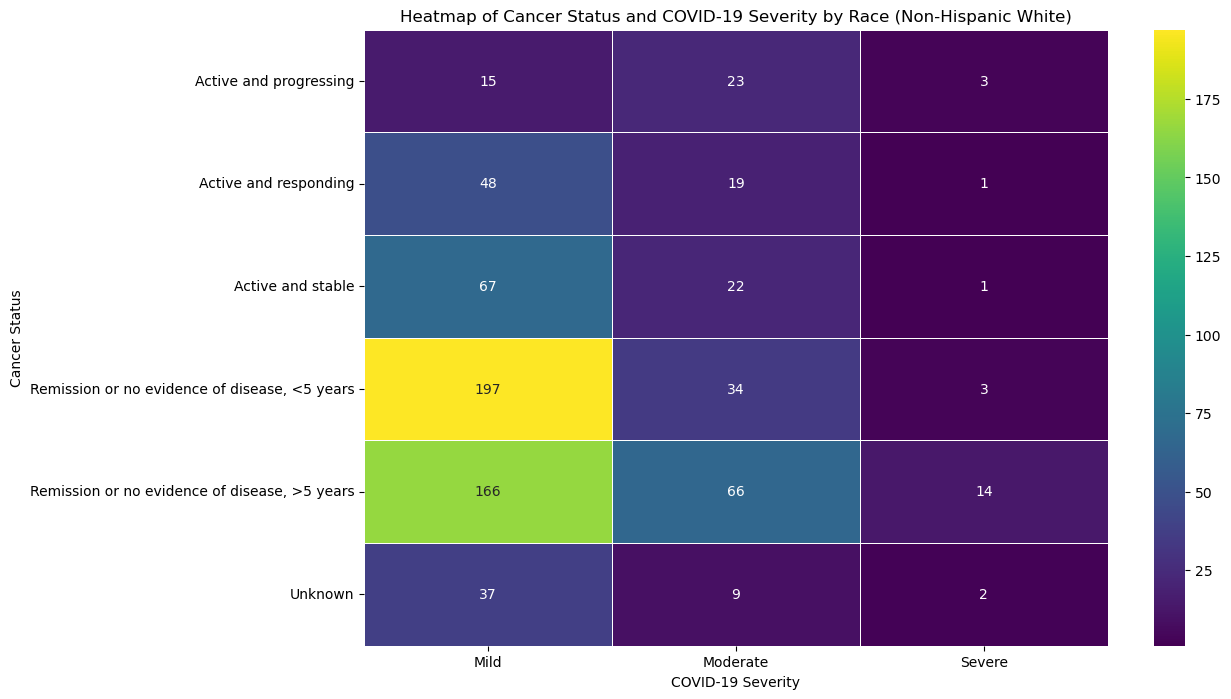

In [16]:
# chatgpt support coding :pivot table 


comparison_data = pd.DataFrame(clean_data.groupby(['Race/Ethnicity', 'Cancer Status', 'COVID-19 Severity']).size()).reset_index()
comparison_data.columns = ['Race/Ethnicity', 'Cancer Status', 'COVID-19 Severity', 'Count']

selected_race_data = comparison_data[comparison_data['Race/Ethnicity'] == 'Non-Hispanic White']


pivot_table = selected_race_data.pivot_table(index='Cancer Status', columns='COVID-19 Severity', values='Count', fill_value=0)


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='d', linewidths=.5)
plt.title('Heatmap of Cancer Status and COVID-19 Severity by Race (Non-Hispanic White)')
plt.xlabel('COVID-19 Severity')
plt.ylabel('Cancer Status')